| Field | Value |
|-|-|
| simulation file | wiggle_test.py |
| result files prefix | wiggle_test |
| # result files | 1\*1\*1\*1\*1\*1\*2\*21\*1\*2\*1 =  |
| simulation start | 2015-10-12 12:46:11 |
| simulation end | 2015-10-12 13:00:51 |
| duration | 0:14:40 |
| repository | https:/ |
| revision hash | [46a97ed027a390a5d8b5427b27721dd596aad4d0](https://tree/46a97ed027a390a5d8b5427b27721dd596aad4d0) |

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get(n_syn, g_S, alpha, beta, eps_factor, g_factor, exc_decrease, exc_level, cycle_dur, wiggle, beta_wiggle):
    return cPickle.load(open('wiggle_test_n_syn_{0}_g_S_{1}_alpha_{2}_beta_{3}_eps_factor_{4}_g_factor_{5}_exc_decrease_{6}_exc_level_{7}_cycle_dur_{8}_wiggle_{9}_beta_wiggle_{10}.p'.format(n_syn, g_S, alpha, beta, eps_factor, g_factor, exc_decrease, exc_level, cycle_dur, wiggle, beta_wiggle),'rb'))


n_syn_s = [str(a) for a in [10]]
g_S_s = [str(a) for a in [0.5]]
alpha_s = [str(a) for a in [-60.0]]
beta_s = [str(a) for a in [0.25]]
eps_factor_s = [str(a) for a in [0.01]]
g_factor_s = [str(a) for a in [10]]
exc_decrease_s = [str(a) for a in [0.99, 0.95]]
exc_level_s = [str(a) for a in array([ 0.01 ,  0.012,  0.014,  0.016,  0.018,  0.02 ,  0.022,  0.024,
        0.026,  0.028,  0.03 ,  0.032,  0.034,  0.036,  0.038,  0.04 ,
        0.042,  0.044,  0.046,  0.048,  0.05 ])]
cycle_dur_s = [str(a) for a in [100.0]]
wiggle_s = [str(a) for a in [4, 5]]
beta_wiggle_s = [str(a) for a in [2]]


params = list(product(n_syn_s, g_S_s, alpha_s, beta_s, eps_factor_s, g_factor_s, exc_decrease_s, exc_level_s, cycle_dur_s, wiggle_s, beta_wiggle_s))

data = {tup:get(*tup) for tup in params}

In [4]:
from ipywidgets import interact, ToggleButtons

In [5]:
def show_plot(key,n_syn, g_S, alpha, beta, eps_factor, g_factor, exc_decrease, exc_level, cycle_dur, wiggle, beta_wiggle,y_c,t_min,t_max):
    figure(figsize=(12,5))
    p = (n_syn, g_S, alpha, beta, eps_factor, g_factor, exc_decrease, exc_level, cycle_dur, wiggle, beta_wiggle)
    curr = data[p][1][0]
    ts = curr.t
    mask = np.logical_and(ts>=t_min,ts<=t_max)
    if key=='y':
        plot(curr.t[mask],curr.res[key][mask,:int(y_c)+1])
    else:
        plot(curr.t[mask],curr.res[key][mask])


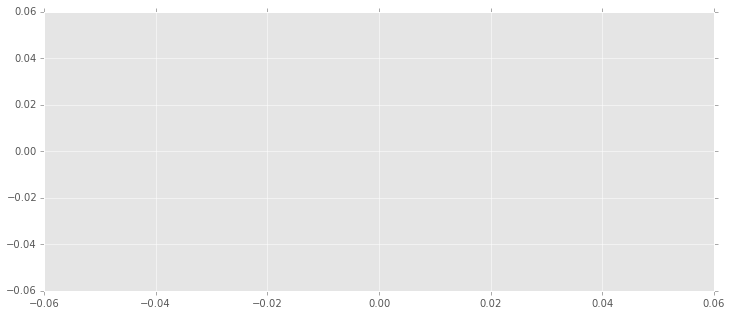

In [6]:
ts = data[params[0]][1][0].t
i = interact(show_plot,
key=ToggleButtons(description='key',options=['dendr_pred','weights','weight_updates', 'PIVs', 'y','h']),
t_min=(0,int(np.round(ts[-1]))),
t_max=(0,int(np.round(ts[-1]))),
n_syn=ToggleButtons(description='n_syn',options=n_syn_s),
g_S=ToggleButtons(description='g_S',options=g_S_s),
alpha=ToggleButtons(description='alpha',options=alpha_s),
beta=ToggleButtons(description='beta',options=beta_s),
eps_factor=ToggleButtons(description='eps_factor',options=eps_factor_s),
g_factor=ToggleButtons(description='g_factor',options=g_factor_s),
exc_decrease=ToggleButtons(description='exc_decrease',options=exc_decrease_s),
exc_level=ToggleButtons(description='exc_level',options=exc_level_s),
cycle_dur=ToggleButtons(description='cycle_dur',options=cycle_dur_s),
wiggle=ToggleButtons(description='wiggle',options=wiggle_s),
beta_wiggle=ToggleButtons(description='beta_wiggle',options=beta_wiggle_s),
y_c=ToggleButtons(description='y_c',options=[str(a) for a in range(5)]))


In [7]:
def phi(U, phi_params):
    return phi_params['r_max'] / (1 + np.exp(-phi_params['beta'] * (U - phi_params['alpha'])))


def get_wiggle_curve(n=1, beta=0.25, beta_wiggle=2.0, alpha=-60.0, decrease = 0.9, r_max = 0.1):
    us = linspace(-100,20,1000)
    phis = phi(us, {'alpha':alpha, 'beta':beta, 'r_max':r_max})
    alphas = []
    for i in range(n):
        alphas.append(us[phis > (i+0.5)*r_max/n][0])
    curr = 0
    for alpha in alphas:
        curr = curr + phi(us, {'alpha':alpha, 'beta':beta_wiggle, 'r_max':r_max/n})
    return us, phis, curr

(-70.0, -50.0)
(-70.0, -50.0)
(-70.0, -45.0)
(-70.0, -50.0)


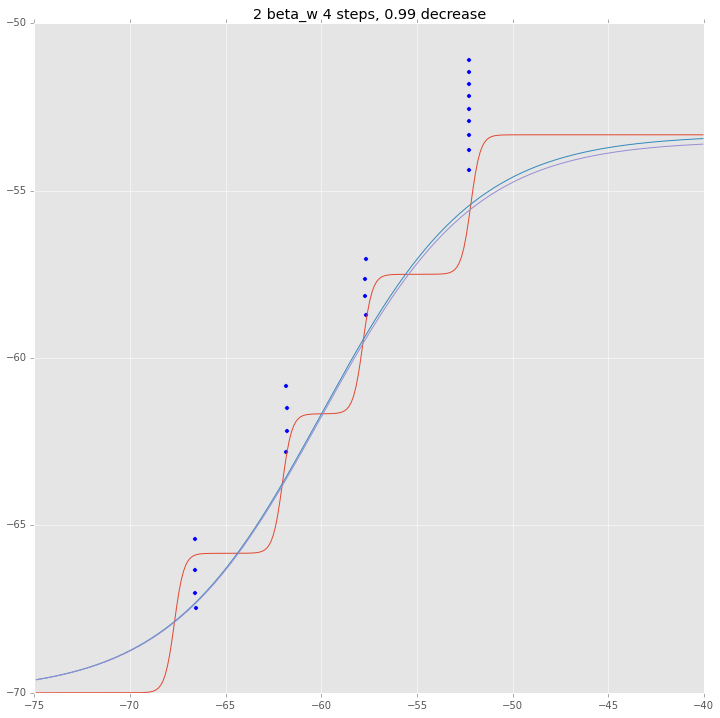

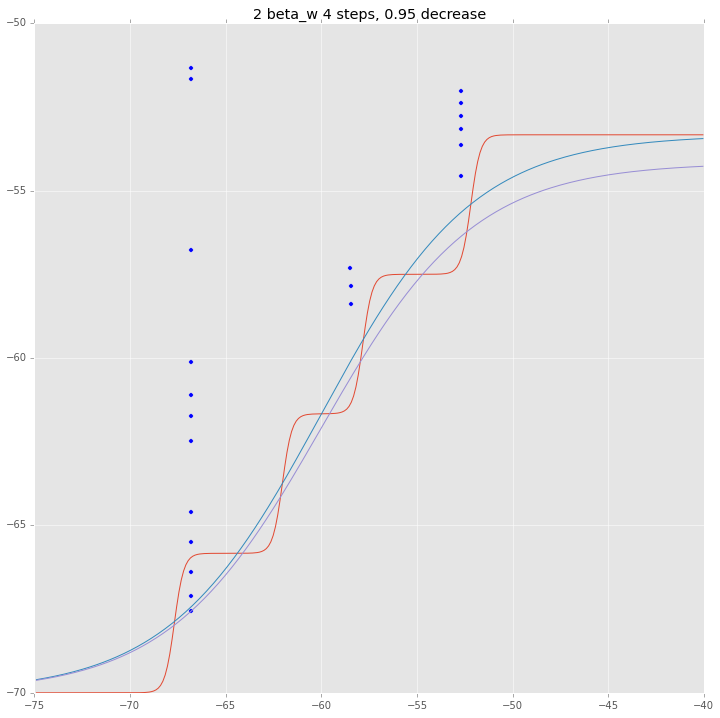

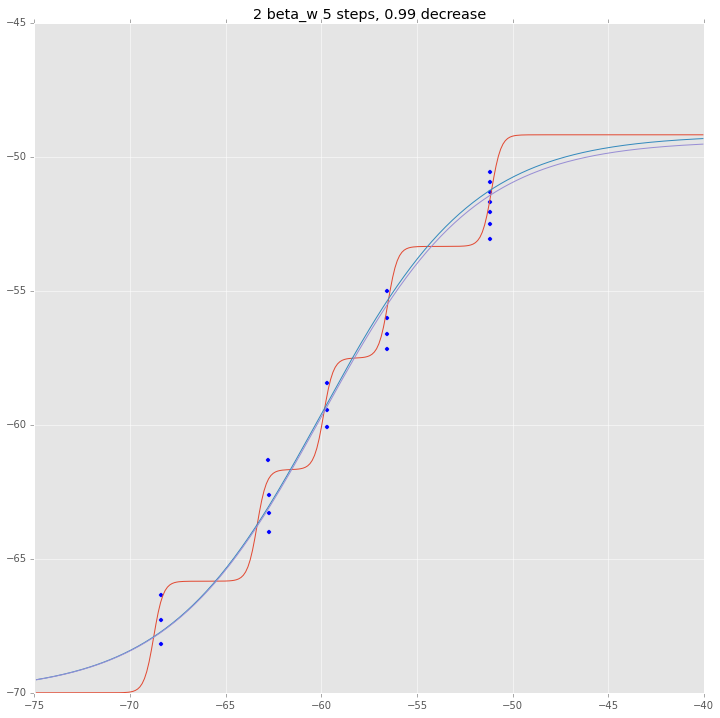

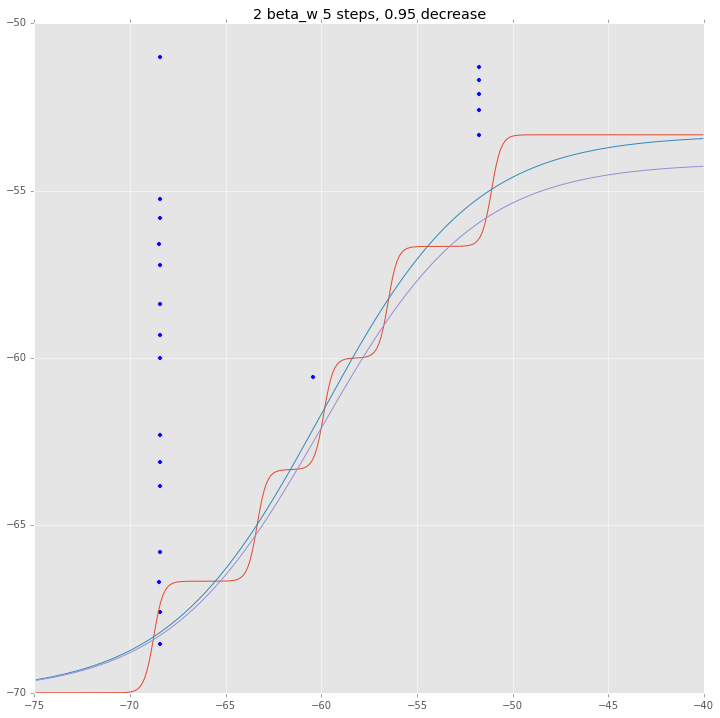

In [9]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s:
        for exc_decrease in exc_decrease_s:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    fig, ax1 = subplots(figsize=(12,12))
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    scatter(arr, nud)
                    print ylim()
                    title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    #ylim([-68,-50])
                    xlim([-75.0,-40.0])
                    xl = xlim()
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    ax2 = ax1.twinx()
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], wiggles[indcs])
                    ax2.plot(us[indcs], phis[indcs])
                    ax2.plot(us[indcs], float(exc_decrease)*phis[indcs])
                    ax2.set_yticks([])

for talk

In [9]:
font = {'size'   : 17}

matplotlib.rc('font', **font)

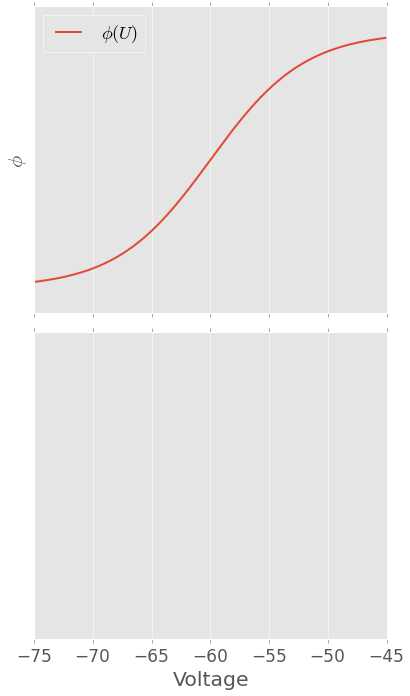

In [71]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax2 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    ax1 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    #ax1.scatter(arr, nud, color='#2c7fb8')
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-75,-45])
                    ax2.set_ylim([-0.01, 0.11])
                    ax2.set_xticklabels([])
                    #ax1.set_ylabel('Nudging voltage')
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs], lw=2)
                    #ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs], lw=2)
                    #ax2.plot(us[indcs], wiggles[indcs], lw=2)
                    ax1.set_yticks([])
                    ax2.set_yticks([])
                    ax2.set_xlim([-75,-45])
                    ax2.set_ylabel('$\phi$')
                    ax1.set_xlabel('Voltage')
                    lims = [-70, -50]
                    #ax1.plot(lims,lims, 'k--', alpha=0.5)
                    ax1.set_ylim([-70, -50])
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)
                    tight_layout()
                    savefig('wiggle1.pdf')
                    savefig('wiggle1.png')

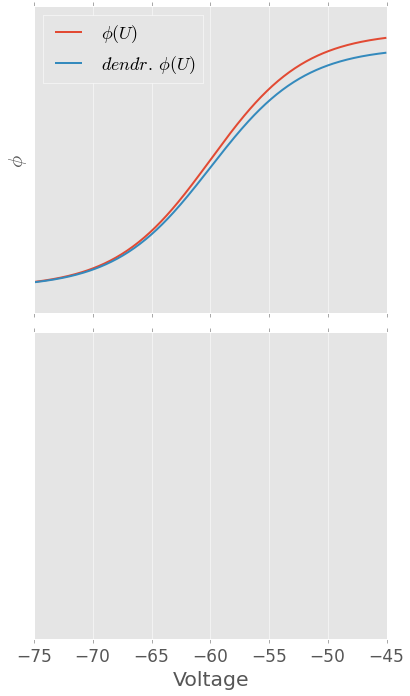

In [72]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax2 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    ax1 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    #ax1.scatter(arr, nud, color='#2c7fb8')
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-75,-45])
                    ax2.set_ylim([-0.01, 0.11])
                    ax2.set_xticklabels([])
                    #ax1.set_ylabel('Nudging voltage')
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs], lw=2)
                    ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs], lw=2)
                    #ax2.plot(us[indcs], wiggles[indcs], lw=2)
                    ax1.set_yticks([])
                    ax2.set_yticks([])
                    ax2.set_xlim([-75,-45])
                    ax2.set_ylabel('$\phi$')
                    ax1.set_xlabel('Voltage')
                    lims = [-70, -50]
                    #ax1.plot(lims,lims, 'k--', alpha=0.5)
                    ax1.set_ylim([-70, -50])
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)
                    tight_layout()
                    savefig('wiggle2.pdf')
                    savefig('wiggle2.png')

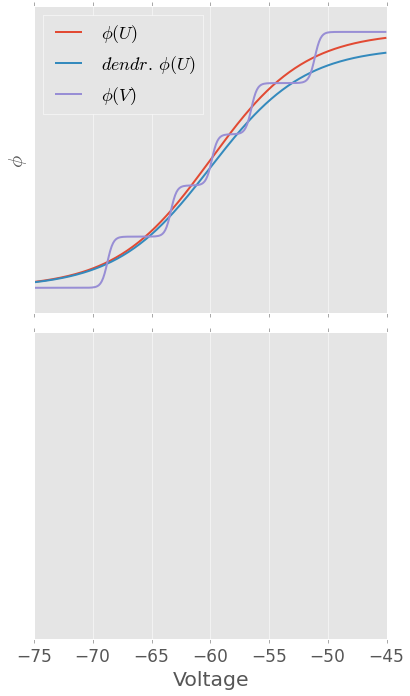

In [73]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax2 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    ax1 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    #ax1.scatter(arr, nud, color='#2c7fb8')
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-75,-45])
                    ax2.set_ylim([-0.01, 0.11])
                    ax2.set_xticklabels([])
                    #ax1.set_ylabel('Nudging voltage')
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs], lw=2)
                    ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs], lw=2)
                    ax2.plot(us[indcs], wiggles[indcs], lw=2)
                    ax1.set_yticks([])
                    ax2.set_yticks([])
                    ax2.set_xlim([-75,-45])
                    ax2.set_ylabel('$\phi$')
                    ax1.set_xlabel('Voltage')
                    lims = [-70, -50]
                    #ax1.plot(lims,lims, 'k--', alpha=0.5)
                    ax1.set_ylim([-70, -50])
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)
                    tight_layout()
                    savefig('wiggle3.pdf')
                    savefig('wiggle3.png')

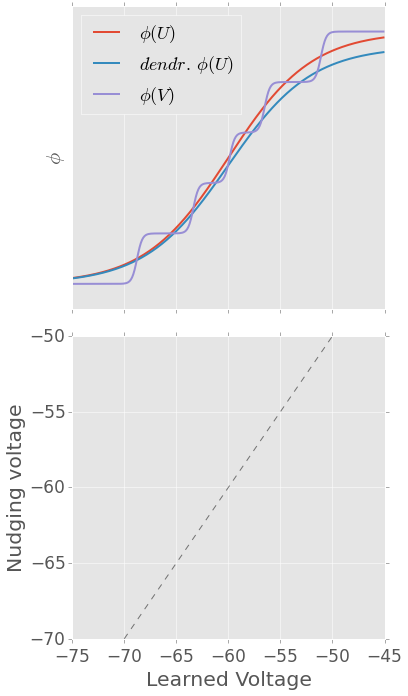

In [79]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax2 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    ax1 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    #ax1.scatter(arr, nud, color='#2c7fb8')
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-75,-45])
                    ax2.set_ylim([-0.01, 0.11])
                    ax2.set_xticklabels([])
                    ax1.set_ylabel('Nudging voltage')
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs], lw=2)
                    ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs], lw=2)
                    ax2.plot(us[indcs], wiggles[indcs], lw=2)
                    #ax1.set_yticks([])
                    ax2.set_yticks([])
                    ax2.set_xlim([-75,-45])
                    ax2.set_ylabel('$\phi$')
                    ax1.set_xlabel('Learned Voltage')
                    lims = [-70, -50]
                    ax1.plot(lims,lims, 'k--', alpha=0.5)
                    ax1.set_ylim([-70, -50])
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)
                    tight_layout()
                    savefig('wiggle4.pdf')
                    savefig('wiggle4.png')

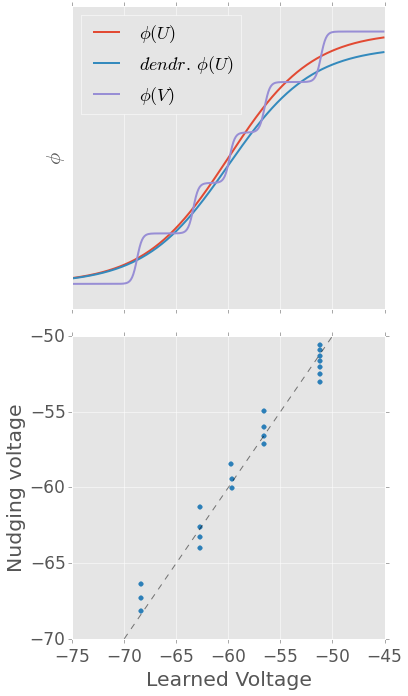

In [80]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax2 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    ax1 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    ax1.scatter(arr, nud, color='#2c7fb8')
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-75,-45])
                    ax2.set_ylim([-0.01, 0.11])
                    ax2.set_xticklabels([])
                    ax1.set_ylabel('Nudging voltage')
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs], lw=2)
                    ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs], lw=2)
                    ax2.plot(us[indcs], wiggles[indcs], lw=2)
                    #ax1.set_yticks([])
                    ax2.set_yticks([])
                    ax2.set_xlim([-75,-45])
                    ax2.set_ylabel('$\phi$')
                    ax1.set_xlabel('Learned Voltage')
                    lims = [-70, -50]
                    ax1.plot(lims,lims, 'k--', alpha=0.5)
                    ax1.set_ylim([-70, -50])
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)
                    tight_layout()
                    savefig('wiggle5.pdf')
                    savefig('wiggle5.png')

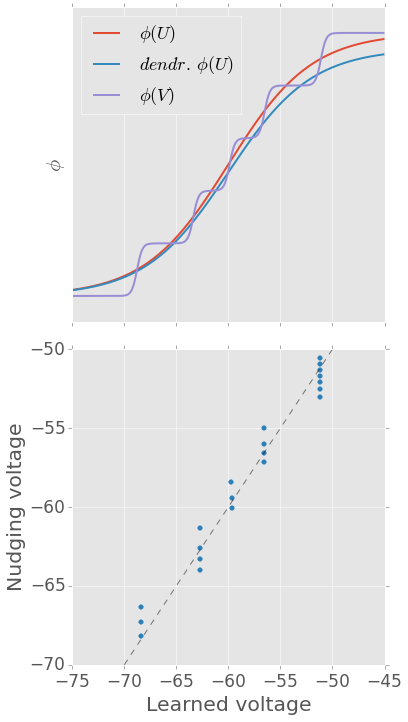

In [64]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax2 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    ax1 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    ax1.scatter(arr, nud, color='#2c7fb8')
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-75,-45])
                    ax2.set_ylim([-0.01, 0.11])
                    ax2.set_xticklabels([])
                    ax1.set_ylabel('Nudging voltage')
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs], lw=2)
                    ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs], lw=2)
                    ax2.plot(us[indcs], wiggles[indcs], lw=2)
                    ax2.set_yticks([])
                    ax2.set_xlim([-75,-45])
                    ax2.set_ylabel('$\phi$')
                    tight_layout()
                    ax1.set_xlabel('Learned voltage')
                    lims = [-70, -50]
                    ax1.plot(lims,lims, 'k--', alpha=0.5)
                    ax1.set_ylim([-70, -50])
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)

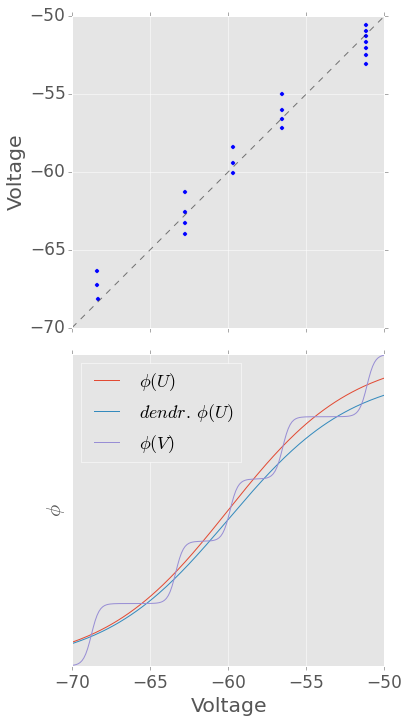

In [33]:
nudge_starts = [200, 800]
for beta_wiggle in beta_wiggle_s:
    for wiggle in wiggle_s[1:]:
        for exc_decrease in exc_decrease_s[:1]:
            for eps_factor in eps_factor_s:
                for g_factor in g_factor_s:
                    figure(figsize=(6,10))
                    ax1 = plt.subplot2grid((2,1), (0, 0), rowspan=1)
                    outcomes = []
                    for idx, exc_level in enumerate(exc_level_s):
                        p = (n_syn_s[0], g_S_s[0], alpha_s[0], beta_s[0], eps_factor, g_factor, exc_decrease, exc_level, cycle_dur_s[0], wiggle, beta_wiggle)
                        curr = data[p][1][0]
                        nudged = 0
                        for n_s in nudge_starts:
                            nudged = nudged + curr.res['y'][n_s:n_s+200, 0]
                        nudged = np.mean(nudged/len(nudge_starts))
                        arrived = np.mean(curr.res['y'][-500:,0])
                        outcomes.append((nudged, arrived))
                    nud, arr = zip(*outcomes)
                    ax1.scatter(arr, nud)
                    #title('{2} beta_w {0} steps, {1} decrease'.format(wiggle, exc_decrease, beta_wiggle))
                    ax1.set_xlim([-70,-50])
                    ax1.set_xticklabels([])
                    ax1.set_ylim([-70, -50])
                    ax1.set_ylabel('Voltage')
                    xl, yl = xlim(), ylim()
                    mi, ma = max([xl[0], yl[0]]), min([xl[1], yl[1]])
                    ax1.plot([mi,ma], [mi,ma], 'k--', alpha=0.5)
                    us, phis, wiggles = get_wiggle_curve(n=int(wiggle), beta_wiggle=float(beta_wiggle)*2, decrease=float(exc_decrease))
                    ax2 = plt.subplot2grid((2,1), (1, 0), rowspan=1)
                    indcs = logical_and(us > xl[0], us < xl[1])
                    ax2.plot(us[indcs], phis[indcs])
                    ax2.plot(us[indcs], 0.95*float(exc_decrease)*phis[indcs])
                    ax2.plot(us[indcs], wiggles[indcs])
                    ax2.set_yticks([])
                    ax2.set_xlim([-70,-50])
                    ax2.set_ylabel('$\phi$')
                    tight_layout()
                    ax2.set_xlabel('Voltage')
                    ax2.legend(['$\phi(U)$', '$dendr.\,\phi(U)$', '$\phi(V)$'], loc=0, fontsize=18)

In [44]:
mi, ma

(-70.0, -50.0)

In [54]:
subplots?

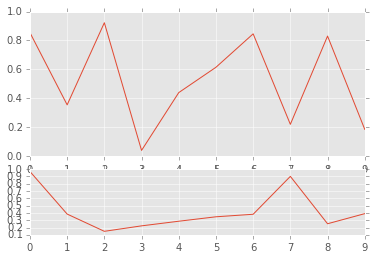

In [27]:
ax2 = plt.subplot2grid((3,1), (0, 0), rowspan=2)
ax2.plot(random.rand(10))
ax3 = plt.subplot2grid((3,1), (2, 0))
ax3.plot(random.rand(10))